# Proyek Analisis Data: [Bike-sharing-dataset]
- **Nama:** [I Wayan Bayu Arya Wiguna]
- **Email:** [iwayanbayuaryawiguna@students.amikom.ac.id]
- **ID Dicoding:** [i_wayan_bayu_arya_w]

## Menentukan Pertanyaan Bisnis

- Apakah ada musim tertentu yang menunjukkan peningkatan signifikan dalam penyewaan sepeda?
- Apakah ada perbedaan yang mencolok dalam penggunaan sepeda antara hari kerja dan akhir pekan?
- Cuaca apa yang paling memengaruhi penurunan atau peningkatan penggunaan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("day.csv")
day_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [3]:
hour_df = pd.read_csv("hour.csv")
hour_df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


**Insight:**
- Dari beberapa kolom yang ditampilkan kedua dataset tersebut terdapat beberapa kolom dataset yang bisa digunakan untuk menjawab pertanyaan analisis bisnis
- Dari dataset ini juga bisa dilihat bahwa nama kolom dari kedua dataset ini memiliki kesamaan nama kolom yang berbeda hanya kolom hr (jam) hanya ada pada dataset hour.csv 

### Assessing Data

In [4]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Terdapat kesalahan tipe data untuk kolom dteday pada dataset day.csv selebihnya sudah tidak ada kesalahan dan keanehan 
- Terdapat kesalahan tipe data untuk kolom dteday pada dataset hour.csv selebihnya sudah tidak ada kesalahan dan keanehan
- Pada kolom weathersit di kedua dataset hanya menampilkan value 1-4, pemberian penjelasan value dari kolom ini sepertinya akan berguna untuk exploratory data kedepannya
- Pada kolom season di kedua dataset juga hanya menampilkan value 1-4, pemberian penjelasan value dari kolom ini sepertinya akan berguna untuk exploratory data kedepannya

### Cleaning Data

In [10]:
dteday_columns = ["dteday"]
for column in dteday_columns:
    day_df[column] = pd.to_datetime(day_df[column])

In [11]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [12]:
dteday_columns = ["dteday"]
for column in dteday_columns:
    hour_df[column] = pd.to_datetime(hour_df[column])

In [13]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Type data kolom dteday pada dataset day.csv telah berhasil di ganti dengan type data yang seharusnya, ini akan mengurangi kesalahan pada pada exploratory data
- Begitu juga pada type data kolom dteday di dataset hour.csv sudah diganti menjadi type data yang seharusnya

## Exploratory Data Analysis (EDA)

### Explore ...

In [14]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [15]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [16]:
day_df["weathersit"] = day_df["weathersit"].replace({
    1 : "Fine Weather",
    2 : "Cloudy",
    3 : "Light Rain",
    4 : "Heavy Rain"
})
print(day_df[["weathersit"]].head())

     weathersit
0        Cloudy
1        Cloudy
2  Fine Weather
3  Fine Weather
4  Fine Weather


In [17]:
hour_df["weathersit"] = hour_df["weathersit"].replace({
    1 : "Fine Weather",
    2 : "Cloudy",
    3 : "Light Rain",
    4 : "Heavy Rain"
})
print(hour_df[["weathersit"]].head())

     weathersit
0  Fine Weather
1  Fine Weather
2  Fine Weather
3  Fine Weather
4  Fine Weather


In [18]:
day_df["season"] = day_df["season"].replace({
    1 : "Springer",
    2 : "Summer",
    3 : "Fall",
    4 : "Winter"
})
print(day_df[["season"]].head())

     season
0  Springer
1  Springer
2  Springer
3  Springer
4  Springer


In [19]:
hour_df["season"] = hour_df["season"].replace({
    1 : "Springer",
    2 : "Summer",
    3 : "Fall",
    4 : "Winter"
})
print(hour_df[["season"]].head())

     season
0  Springer
1  Springer
2  Springer
3  Springer
4  Springer


In [20]:
seasonal_agg = day_df.groupby(by="season").agg({
    "cnt": ["sum", "mean", "max", "min", "std"]
}).reset_index()
seasonal_agg

season      cnt                                      
                 sum         mean   max   min          std
0      Fall  1061129  5644.303191  8714  1115  1459.800381
1  Springer   471348  2604.132597  7836   431  1399.942119
2    Summer   918589  4992.331522  8362   795  1695.977235
3    Winter   841613  4728.162921  8555    22  1699.615261

In [21]:
seasonal_agg_hour = hour_df.groupby(by="season").agg({
    "cnt": ["sum", "mean", "max", "min", "std"]
}).reset_index()
seasonal_agg_hour

season      cnt                                 
                 sum        mean  max min         std
0      Fall  1061129  236.016237  977   1  197.711630
1  Springer   471348  111.114569  801   1  119.224010
2    Summer   918589  208.344069  957   1  188.362473
3    Winter   841613  198.868856  967   1  182.967972

In [22]:
spring_day_df = day_df[day_df['season'] == 'Springer']['cnt']
summer_day_df = day_df[day_df['season'] == 'Summer']['cnt']
fall_day_df = day_df[day_df['season'] == 'Fall']['cnt']
winter_day_df = day_df[day_df['season'] == 'Winter']['cnt']

f_statictic, p_value = stats.f_oneway(spring_day_df, summer_day_df, fall_day_df, winter_day_df)

print(f"F-Statistic: {f_statictic}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("Terdapat perbedaan yang signifikan pada rata-rata penyewaan sepeda (Berdasarkan hari) di setiap musim.")
else:
    print("Tidak terdapat perbedaan yang signifikan pada rata-rata penyewaan sepeda (Berdasarkan hari) di setiap musim.")

F-Statistic: 128.76962156570784
P-Value: 6.720391362913176e-67
Terdapat perbedaan yang signifikan pada rata-rata penyewaan sepeda (Berdasarkan hari) di setiap musim.


In [23]:
spring_hour_df = hour_df[hour_df['season'] == 'Springer']['cnt']
summer_hour_df = hour_df[hour_df['season'] == 'Summer']['cnt']
fall_hour_df = hour_df[hour_df['season'] == 'Fall']['cnt']
winter_hour_df = hour_df[hour_df['season'] == 'Winter']['cnt']

f_statistic, p_value = stats.f_oneway(spring_hour_df, summer_hour_df, fall_hour_df, winter_hour_df)

# Menampilkan hasil ANOVA
print(f"F-Statistic: {f_statistic}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("Terdapat perbedaan yang signifikan pada rata-rata penyewaan sepeda (Berdasarkan jam) di setiap musim.")
else:
    print("Tidak terdapat perbedaan yang signifikan pada rata-rata penyewaan sepeda (Berdasarkan jam) di setiap musim.")

F-Statistic: 409.1810372630525
P-Value: 7.40107139971279e-257
Terdapat perbedaan yang signifikan pada rata-rata penyewaan sepeda (Berdasarkan jam) di setiap musim.


In [24]:
total_rentals_by_type = day_df.groupby('workingday')['cnt'].sum().reset_index()
total_rentals_by_type

,workingday,cnt
0,0,1000269
1,1,2292410


In [45]:
day_df['workingday'] = day_df['workingday'].replace({ 'Weekend' : 0, 'Weekday' : 1}).infer_objects(copy=False)
print(day_df[["workingday"]].head())

   workingday
0           0
1           0
2           1
3           1
4           1


In [47]:
day_df['workingday_label'] = day_df['workingday'].replace({0: 'Weekend', 1: 'Weekday'})

In [52]:
weekday_rentals = day_df[day_df['workingday'] == 1]['cnt']  
weekend_rentals = day_df[day_df['workingday'] == 0]['cnt']

t_statistic, p_value = stats.ttest_ind(weekday_rentals, weekend_rentals)

print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("Terdapat perbedaan yang signifikan dalam penyewaan sepeda (Berdasarkan Hari) antara hari kerja dan akhir pekan.")
else:
    print("Tidak terdapat perbedaan yang signifikan dalam penyewaan sepeda (Berdasarkan Hari) antara hari kerja dan akhir pekan.")

T-Statistic: 1.6543102137118633
P-Value: 0.09849496160024915
Tidak terdapat perbedaan yang signifikan dalam penyewaan sepeda (Berdasarkan Hari) antara hari kerja dan akhir pekan.


In [53]:
hour_workingday_total_rentals = hour_df.groupby('workingday')['cnt'].sum().reset_index()
hour_workingday_total_rentals

,workingday,cnt
0,0,1000269
1,1,2292410


In [50]:
hour_df['workingday_label'] = hour_df['workingday'].replace({0: 'Weekend', 1: 'Weekday'})

In [54]:
weekday_rentals = hour_df[hour_df['workingday'] == 1]['cnt']  
weekend_rentals = hour_df[hour_df['workingday'] == 0]['cnt']

t_statistic, p_value = stats.ttest_ind(weekday_rentals, weekend_rentals)

print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("Terdapat perbedaan yang signifikan dalam penyewaan sepeda (Berdasarkan jam) antara hari kerja dan akhir pekan.")
else:
    print("Tidak terdapat perbedaan yang signifikan dalam penyewaan sepeda (Berdasarkan jam) antara hari kerja dan akhir pekan.")

T-Statistic: 3.993973309150058
P-Value: 6.524264547107065e-05
Terdapat perbedaan yang signifikan dalam penyewaan sepeda (Berdasarkan jam) antara hari kerja dan akhir pekan.


In [31]:
total_rentals_by_weather_day = day_df.groupby('weathersit')['cnt'].sum().reset_index()
total_rentals_by_weather_day

,weathersit,cnt
0,Cloudy,996858
1,Fine Weather,2257952
2,Light Rain,37869


In [32]:
weather_groups_day = [day_df[day_df['weathersit'] == weather]['cnt'] for weather in total_rentals_by_weather_day['weathersit']]
f_statistic_day, p_value_day = stats.f_oneway(*weather_groups_day)

print(f"F-Statistic: {f_statistic_day}")
print(f"P-Value: {p_value_day}")

if p_value_day < 0.05:
    print("Terdapat perbedaan yang signifikan dalam penyewaan sepeda (per Hari) berdasarkan cuaca.")
else:
    print("Tidak terdapat perbedaan yang signifikan dalam penggunaan sepeda (per Hari) berdasarkan cuaca.")

F-Statistic: 40.06604492024684
P-Value: 3.106317270053755e-17
Terdapat perbedaan yang signifikan dalam penyewaan sepeda (per Hari) berdasarkan cuaca.


In [33]:
total_rentals_by_weather_hour = hour_df.groupby('weathersit')['cnt'].sum().reset_index()
total_rentals_by_weather_hour

,weathersit,cnt
0,Cloudy,795952
1,Fine Weather,2338173
2,Heavy Rain,223
3,Light Rain,158331


In [34]:
weather_groups_hour = [hour_df[hour_df['weathersit'] == weather]['cnt'] for weather in total_rentals_by_weather_hour['weathersit']]
f_statistic_hour, p_value_hour = stats.f_oneway(*weather_groups_hour)

print(f"F-Statistic: {f_statistic_hour}")
print(f"P-Value: {p_value_hour}")

if p_value_hour < 0.05:
    print("Terdapat perbedaan yang signifikan dalam penyewaan sepeda (per Jam) berdasarkan cuaca.")
else:
    print("Tidak terdapat perbedaan yang signifikan dalam penyewaan sepeda (per Jam) berdasarkan cuaca.")

F-Statistic: 127.17386949967269
P-Value: 1.7347820521803117e-81
Terdapat perbedaan yang signifikan dalam penyewaan sepeda (per Jam) berdasarkan cuaca.


**Insight:**
- Terdapat perbedaan yang signifikan pada rata-rata penyewaan sepeda harian dan perjam di setiap musim
- Tidak terdapat perbedaan yang signifikan dalam penyewaan sepeda (Berdasarkan Hari) antara hari kerja dan akhir pekan
- Terdapat perbedaan yang signifikan dalam penyewaan sepeda (Berdasarkan jam) antara hari kerja dan akhir pekan
- Terdapat perbedaan yang signifikan dalam penyewaan sepeda (per Hari dan per Jam) berdasarkan cuaca

## Visualization & Explanatory Analysis

### Pertanyaan 1:

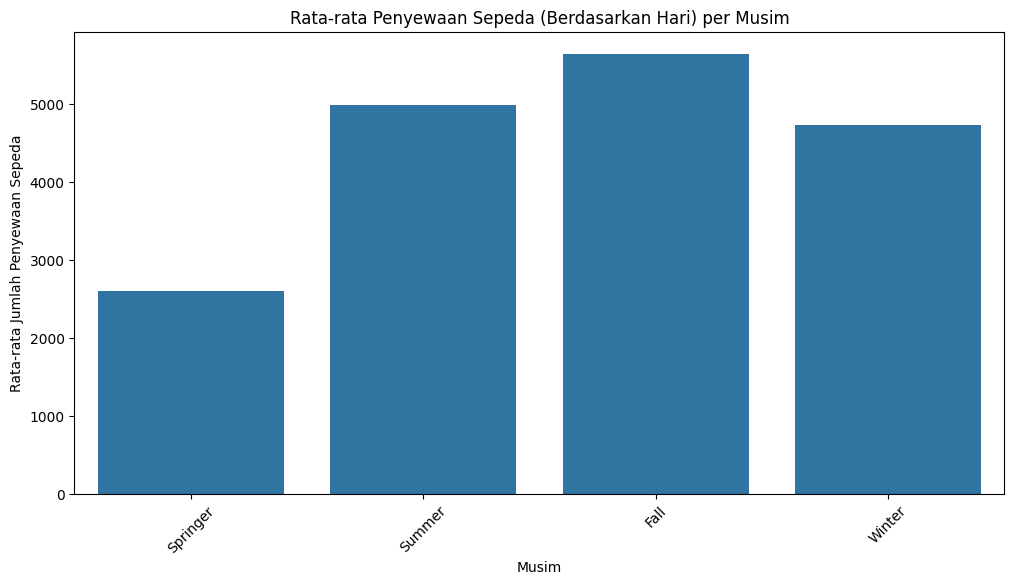

In [35]:
plt.figure(figsize=(12, 6))
sns.barplot(x='season', y='cnt', data=day_df, estimator=lambda x: sum(x) / len(x), errorbar=None)
plt.title('Rata-rata Penyewaan Sepeda (Berdasarkan Hari) per Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda')
plt.xticks(rotation=45)
plt.show()

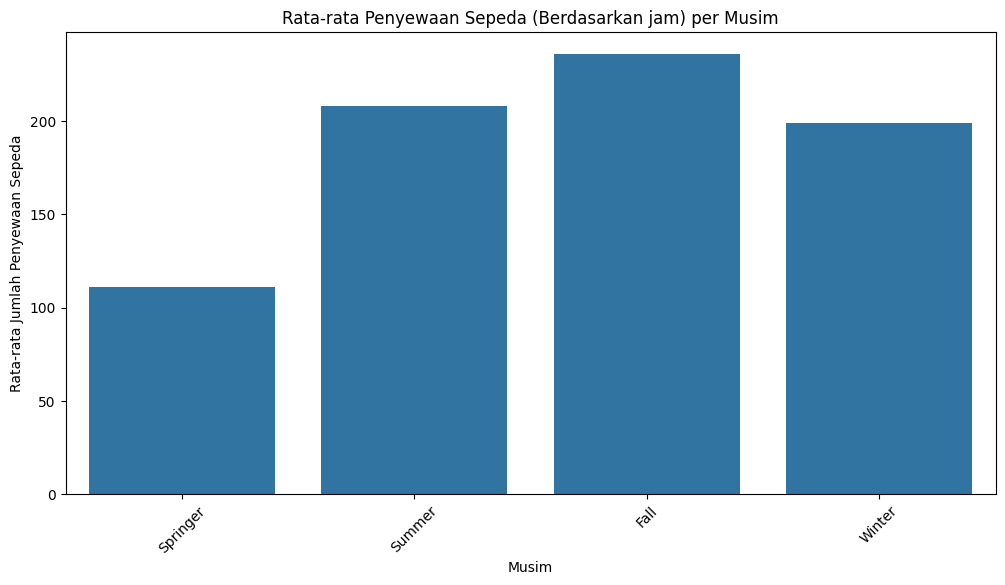

In [36]:
plt.figure(figsize=(12, 6))
sns.barplot(x='season', y='cnt', data=hour_df, estimator=lambda x: sum(x) / len(x), errorbar=None)
plt.title('Rata-rata Penyewaan Sepeda (Berdasarkan jam) per Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda')
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 2:

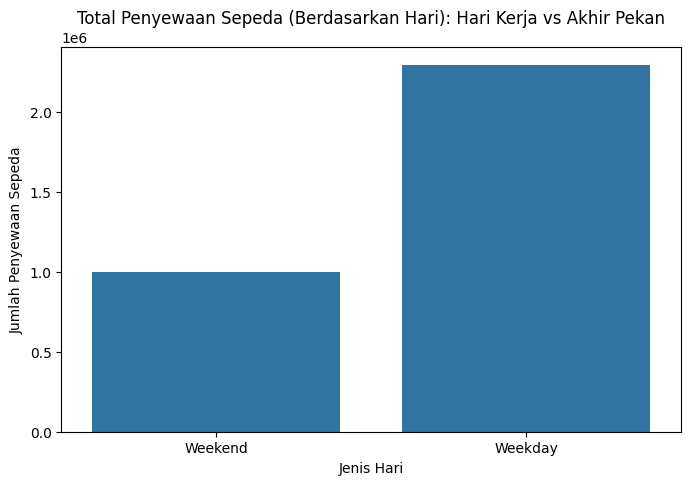

In [49]:
plt.figure(figsize=(8, 5))
sns.barplot(x='workingday_label', y='cnt', data=day_df, estimator=np.sum, errorbar=None)  
plt.title('Total Penyewaan Sepeda (Berdasarkan Hari): Hari Kerja vs Akhir Pekan')
plt.xlabel('Jenis Hari')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

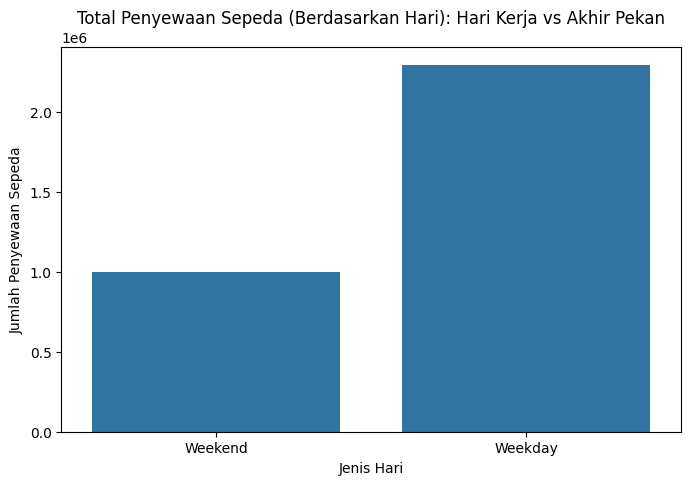

In [51]:
plt.figure(figsize=(8, 5))
sns.barplot(x='workingday_label', y='cnt', data=hour_df, estimator=np.sum, errorbar=None)  
plt.title('Total Penyewaan Sepeda (Berdasarkan Hari): Hari Kerja vs Akhir Pekan')
plt.xlabel('Jenis Hari')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

### Pertanyaan 3:

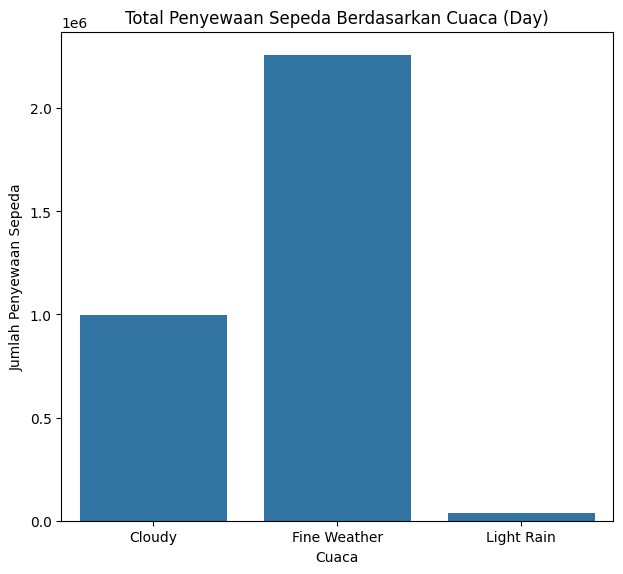

In [39]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='weathersit', y='cnt', data=total_rentals_by_weather_day, estimator=sum, errorbar=None)
plt.title('Total Penyewaan Sepeda Berdasarkan Cuaca (Day)')
plt.xlabel('Cuaca')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks()
plt.tight_layout();

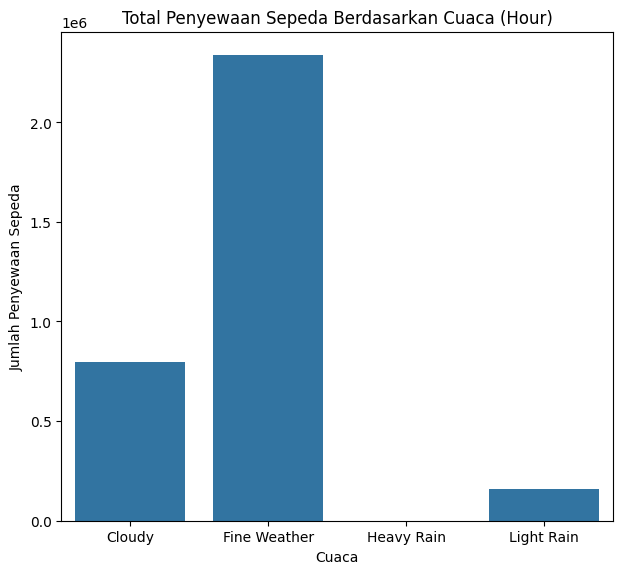

In [40]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='weathersit', y='cnt', data=total_rentals_by_weather_hour, estimator=sum, errorbar=None)
plt.title('Total Penyewaan Sepeda Berdasarkan Cuaca (Hour)')
plt.xlabel('Cuaca')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks()
plt.tight_layout();

**Insight:**
- Pada bar chart Rata-rata Penyewaan Sepeda (Berdasarkan Hari) per Musim terlihat bahwa penyewaan terbanyak terjadi pada musim gugur (Fall season) dan paling sedikit pada musim semi (springer) 
- Pada bar chart Rata-rata Penyewaan Sepeda (Berdasarkan jam) per Musim terlihat juga bahwa penyewaan terbanyak terjadi pada musim gugur (Fall season) dan paling sedikit pada musim semi (springer) 
- Pada bar chart Total Penyewaan Sepeda (Berdasarkan Hari): Hari Kerja vs Akhir Pekan terlihat bahwa penyewaan terbanyak terjadi pada hari kerja (Weekday)
- Pada bar chart Total Penyewaan Sepeda (Berdasarkan Jam): Hari Kerja vs Akhir Pekan terlihat bahwa penyewaan terbanyak terjadi pada hari kerja (Weekday)
- Pada bar chart Total Penyewaan Sepeda Berdasarkan Cuaca (Day) terlihat bahwa penyewaan terbanyak terjadi pada cuaca cerah (Fine Weather) dan paling sedikit pada cuaca hujan ringan (Light Rain)
- Pada bar chart Total Penyewaan Sepeda Berdasarkan Cuaca (Hour) terlihat bahwa penyewaan terbanyak terjadi pada cuaca cerah (Fine Weather) dan paling sedikit pada cuaca hujan lebat (Heavy Rain)

## Analisis Lanjutan (Opsional)

In [55]:
day_df.to_csv('day_preprocessed.csv', index=False)
hour_df.to_csv('hour_preprocessed.csv', index=False)

## Conclusion

- Conclution pertanyaan 1: 
  Dari analisis visual dan statistik, musim gugur (Fall) menunjukkan jumlah penyewaan tertinggi dibandingkan dengan musim lainnya. Ini menunjukkan bahwa pengguna sepeda cenderung lebih aktif dan memilih untuk menyewa sepeda pada musim ini, mungkin karena kondisi cuaca yang lebih nyaman dan suasana yang lebih menarik untuk beraktivitas di luar ruangan. Sebaliknya, musim semi (Spring) menunjukkan jumlah penyewaan terendah. Hal ini dapat dipengaruhi oleh faktor-faktor seperti cuaca yang tidak menentu atau kurangnya kegiatan luar ruangan selama musim ini. Pihak penyewaan sepeda disarankan untuk mengembangkan strategi pemasaran yang lebih agresif selama musim gugur untuk memanfaatkan tingginya permintaan. Sementara itu, pada musim semi, perlu dipertimbangkan program-program promosi atau penawaran khusus untuk meningkatkan minat penyewaan sepeda.
- Conclution pertanyaan 2 :
  Analisis dari bar chart menunjukkan bahwa jumlah penyewaan sepeda paling banyak terjadi pada hari kerja (Weekday). Hal ini mengindikasikan bahwa masyarakat cenderung lebih aktif menggunakan sepeda untuk keperluan sehari-hari, seperti pergi bekerja atau beraktivitas lainnya pada hari kerja. Sebaliknya, pada akhir pekan (Weekend), jumlah penyewaan sepeda terlihat jauh lebih rendah dibandingkan dengan hari kerja. Ini mungkin disebabkan oleh berbagai faktor, seperti perubahan pola mobilitas masyarakat, di mana lebih banyak orang mungkin memilih untuk melakukan aktivitas di luar rumah tanpa menggunakan sepeda atau menggunakan moda transportasi lain. Pola yang konsisten ini antara penyewaan pada hari kerja dan akhir pekan menunjukkan adanya perbedaan mencolok dalam penggunaan sepeda, dengan pengguna sepeda lebih cenderung menyewa pada hari kerja. Hal ini mencerminkan perilaku pengguna yang lebih memilih sepeda sebagai sarana transportasi praktis selama aktivitas sehari-hari dibandingkan saat bersantai di akhir pekan.
- Conclution pertanyaan 3 :
  Dari analisis kedua bar chart, terlihat bahwa penyewaan sepeda tertinggi terjadi pada kondisi cuaca cerah (Fine Weather). Hal ini menunjukkan bahwa pengguna lebih cenderung untuk menyewa sepeda ketika cuaca baik, yang mengindikasikan bahwa faktor cuaca cerah berkontribusi positif terhadap peningkatan penggunaan sepeda. Sebaliknya, kondisi cuaca hujan, baik hujan ringan (Light Rain) maupun hujan lebat (Heavy Rain), menunjukkan jumlah penyewaan yang lebih rendah. Ini mengindikasikan bahwa cuaca yang tidak mendukung, seperti hujan, memiliki dampak negatif yang signifikan terhadap minat masyarakat untuk menggunakan sepeda. Pola yang konsisten ini antara penyewaan berdasarkan cuaca pada hari dan jam menunjukkan bahwa kondisi cuaca sangat berpengaruh terhadap keputusan pengguna untuk menyewa sepeda. Cuaca cerah mendorong pengguna untuk beraktivitas di luar ruangan, sementara cuaca buruk mengurangi ketertarikan mereka untuk menggunakan sepeda.